<a href="https://colab.research.google.com/github/vipul-solanki/Credit-risk-prediction/blob/main/CreditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Credit Risk.
### Project Type - EDA/Prediction
### Name - Vipul Solanki
### Type - Individual

# Project Summary - German Credit Risk Prediction

Objective:
The objective of this project is to assess and predict credit risk for individuals using German credit risk data. The project involves conducting exploratory data analysis (EDA) to gain insights into the dataset and building a predictive model to assess the creditworthiness of individuals.

Data:
The dataset contains information about individuals applying for credit in Germany. It includes various features such as personal information, financial history, and other relevant attributes. The target variable is to indicate whether an individual is a credit risk or not.

**German credit risk data -**

Age(int) - age of customer

sex - male/female

job - 0 (Unskilled and non-resident),  1 (Unskilled and resident), 2 (skilled), 3 (Highly skilled)

Housing - own/rent/free

saving account - little/moderate/rich/quite rich

checking amount - in DM (Duetsch Mark)

credit amount - DM

duration - month

purpose - object for which credit

risk - good/bad

# Github link - https://github.com/vipul-solanki/Credit-risk-prediction.git


# Problem Statement:

Given historical data on individuals' credit behavior, the goal is to predict whether a new applicant is likely to be a good or bad credit risk. In simpler terms, we want to build a model that helps a lender decide whether to approve or deny a credit application based on the applicant's characteristics and financial history. This prediction can assist in making informed decisions to minimize the risk of lending to individuals who may struggle to repay their debts.

# Let's Begin :

### Import Libraries

In [2]:
# Loading important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split as tts, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Loading dataset

In [3]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading data
path = "/content/drive/MyDrive/Almabetter/Project/Module 6/Assignment/german_credit_data.csv"
df = pd.read_csv(path)

In [5]:
# First 5 row of data
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


## Exploratory Data Analysis:

### Data Overview

In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
# shape of data
df.shape

(1000, 11)

In [8]:
# describe
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


### Data Preprocessing :

### Missing values

In [22]:
# missing values
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

From the basic information,

There is an extra column (unknown) for index. Drop that column.

There are some missing values in columns "Saving accounts" and "Checking accounts".

In [10]:
# drop unknown column

df = df.drop("Unnamed: 0", axis=1)

In [21]:
# Handling the missing values

#Best way to fill missing values of categorical variable with mode:

df["Saving accounts"].fillna(df['Saving accounts'].mode()[0], inplace=True)
df["Checking account"].fillna(df['Checking account'].mode()[0], inplace=True)

In [23]:
# Checking missing values

df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

### Duplicate values

In [11]:
# Check for duplicates
print("There are ",df.duplicated().sum()," duplicate rows.")

# drop duplicates if any
df.drop_duplicates()
df.shape

There are  0  duplicate rows.


(1000, 10)

### Outliers

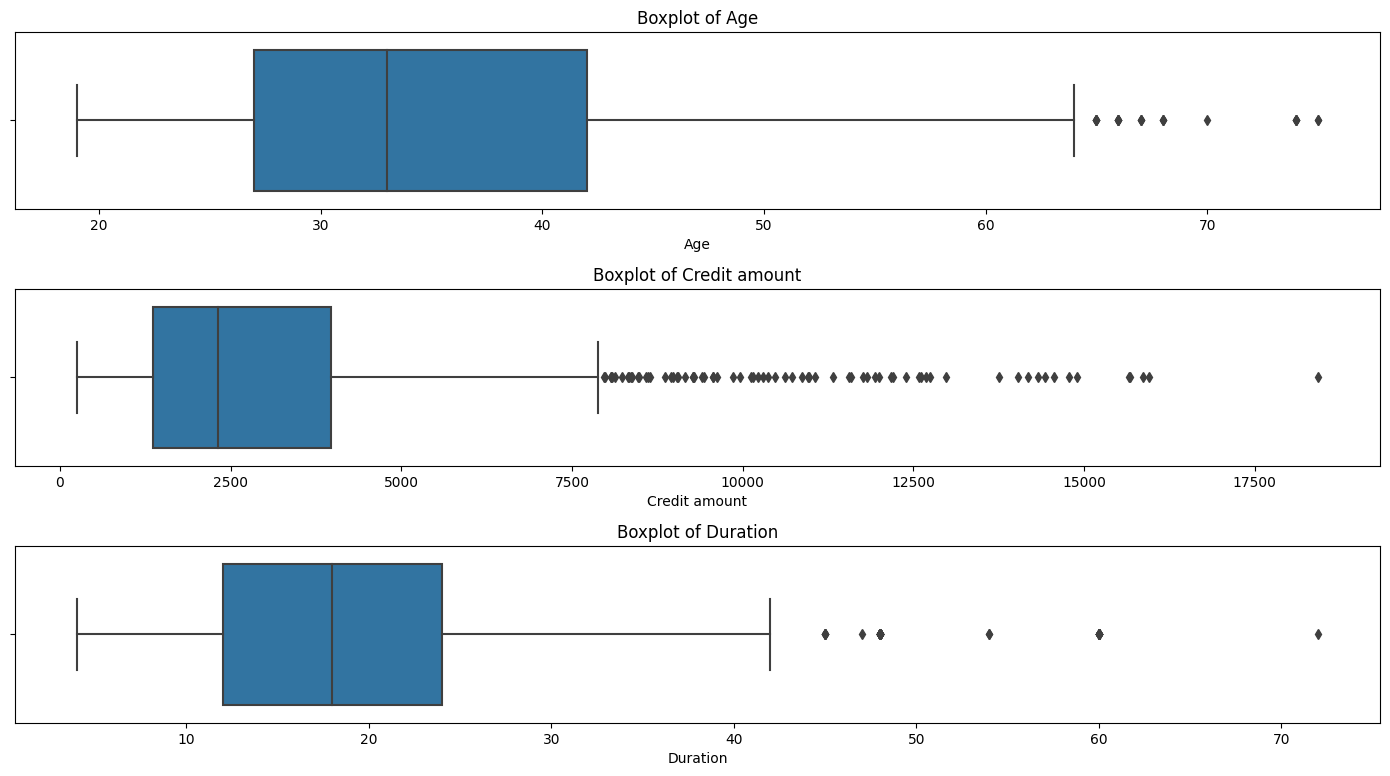

In [20]:
# Checking for Outliers

# Create boxplots for all numerical columns to identify outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Drop job column it has int data type but categorical variable
numerical_column = numerical_columns.drop("Job")

plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_column):
    plt.subplot(4, 1, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

We are not replacing outliers because the ratio of outliers are much that may effect out prediction.

### Target variable

In [12]:
# Count of target variable
df["Risk"].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

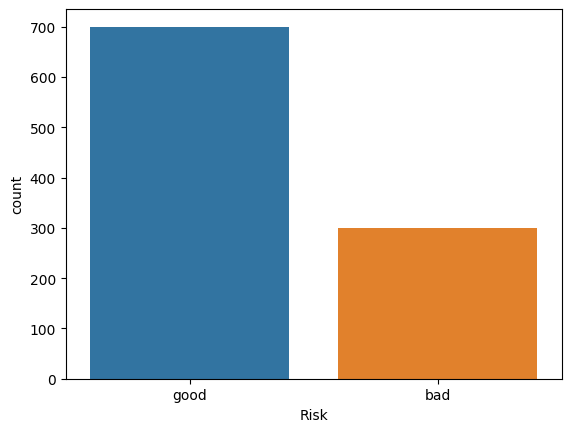

In [13]:
# plot of target variable
sns.countplot(x="Risk", data=df)
plt.show()

The ratio for target variable is 7:3 for good to bad.

There are 700 data points for good risk and 300 data point for the bad risk.

### Visualizing the numerical variables

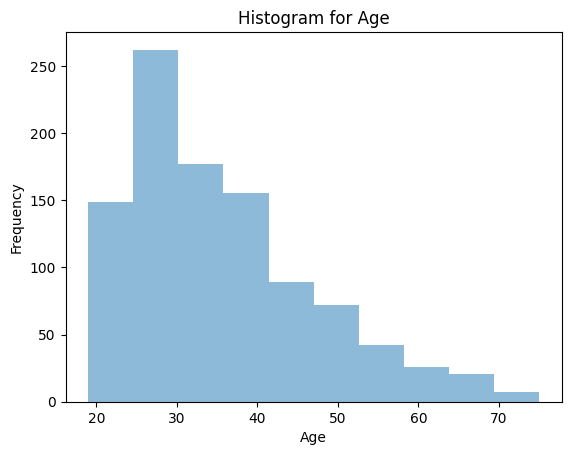

In [29]:
# Ploting histogram for the "age" variable

df["Age"].plot.hist(alpha=0.5)
plt.xlabel("Age")
plt.title("Histogram for Age")
plt.show()

The distribution of age little tilied over left side.

The maximum data of age is from 20 to 40.

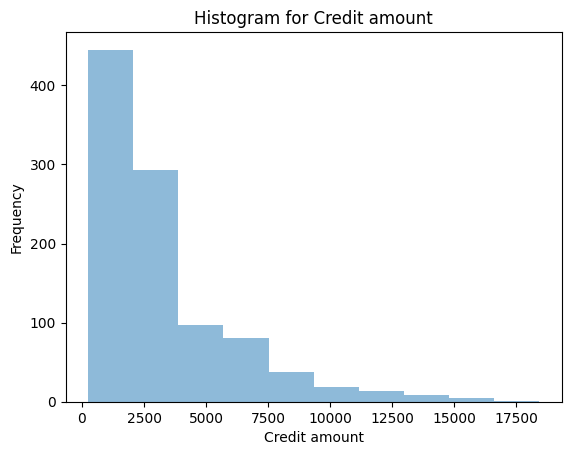

In [30]:
# Ploting histogram for the "Credit amount" variable

df["Credit amount"].plot.hist(alpha=0.5)
plt.xlabel("Credit amount")
plt.title("Histogram for Credit amount")
plt.show()

The distribution of credit amount shows that most of customers are having lower credit amount between 0-7500.

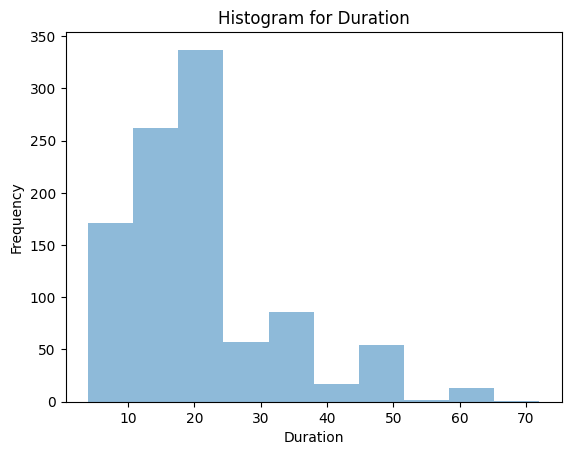

In [31]:
# Ploting histogram for the "Duration" variable

df["Duration"].plot.hist(alpha=0.5)
plt.xlabel("Duration")
plt.title("Histogram for Duration")
plt.show()

The duration variable also tiled over left side. Maximum customer have duration
between 0-25.

### Visualizing categorical variable

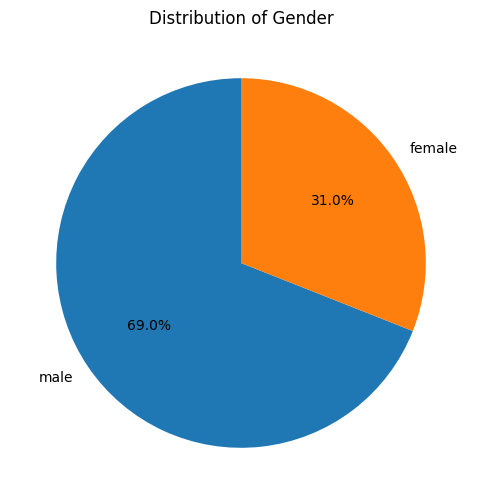

In [34]:
# Create a pie chart for 'Sex'
plt.figure(figsize=(6, 6))
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender')
plt.show()

The ratio for gender variable is 69:31 for male to female.

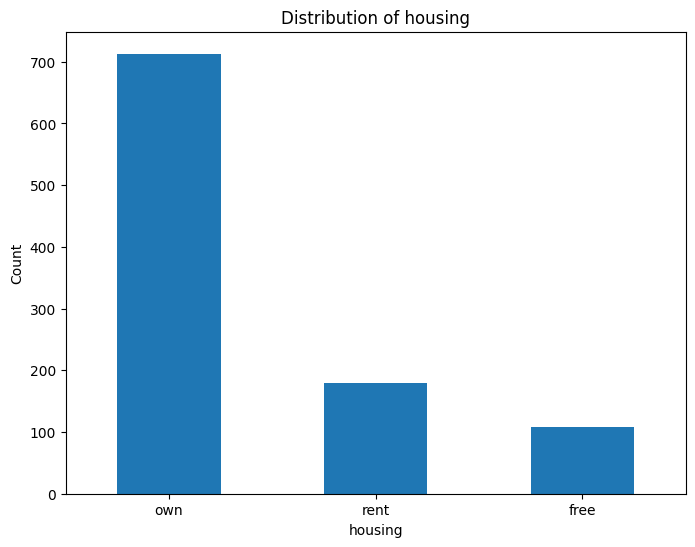

In [36]:
# Create a column chart for 'Housing'
plt.figure(figsize=(8, 6))
df["Housing"].value_counts().plot(kind='bar')
plt.title('Distribution of housing')
plt.xlabel('housing')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Distribution for Housing favour 'own' category with 700 customer.
'rent' with 200 and 'free' with 100.

### Visualizing variable with targets.

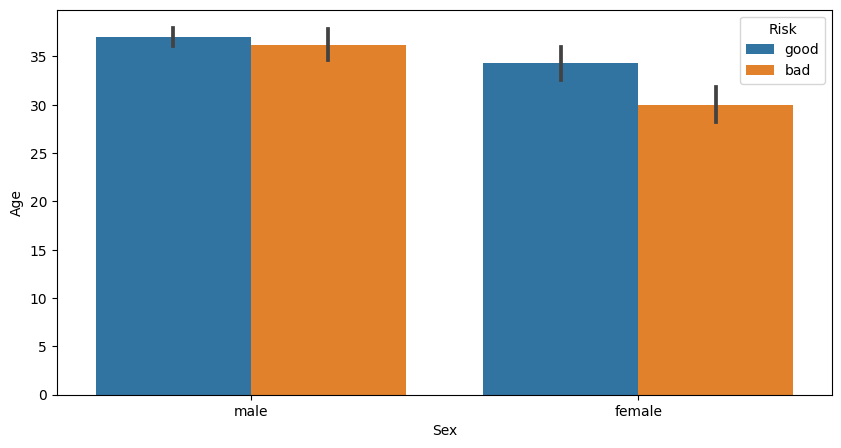

In [38]:
# Plot bar chat with x-gender, y-age, hue-risk
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x='Sex', y='Age', hue='Risk', data=df)

The bar plot shows the average age of individuals, grouped by gender ('Sex'), and each bar is further divided into segments representing different risk categories

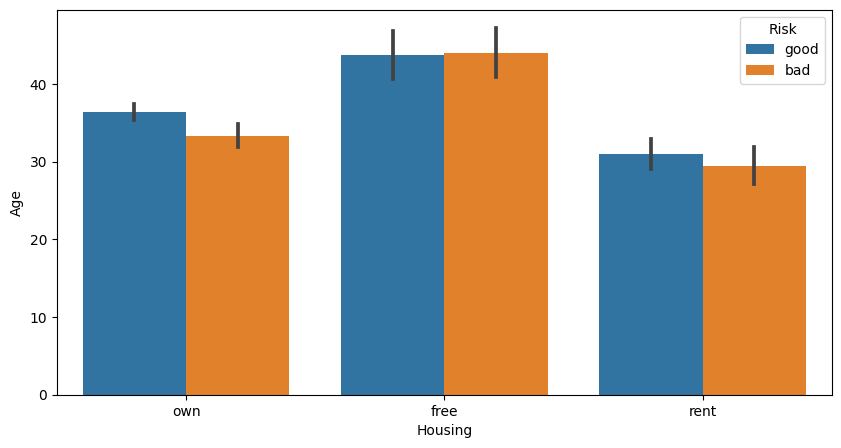

In [39]:
# Plot bar chat with x-Housing, y-age, hue-risk
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x='Housing', y='Age', hue='Risk', data=df)

The bar plot shows the average age of individuals, grouped by housing category, and each bar is further divided into segments representing different risk categories

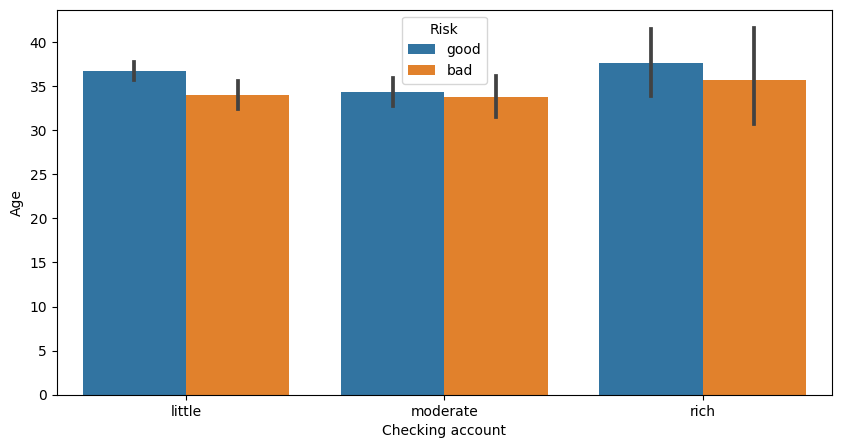

In [40]:
# Plot bar chat with x-Checking account, y-age, hue-risk
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x='Checking account', y='Age', hue='Risk', data=df)

The bar plot shows the average age of individuals, grouped by Checking account, and each bar is further divided into segments representing different risk categories

### Encoding

In [42]:
# Encoding for the variable with 2 categories.

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    label_encoder(df, col)

In [44]:
# Encoding for the variable with more than 2 categories.

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


cate_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, cate_cols)

In [45]:
df.head()

,Age,Sex,Credit amount,Duration,Risk,Job_1,Job_2,Job_3,Housing_own,Housing_rent,...,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,1169,6,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,0,5951,48,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,1,7882,42,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,1,4870,24,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Correlation Heatmap

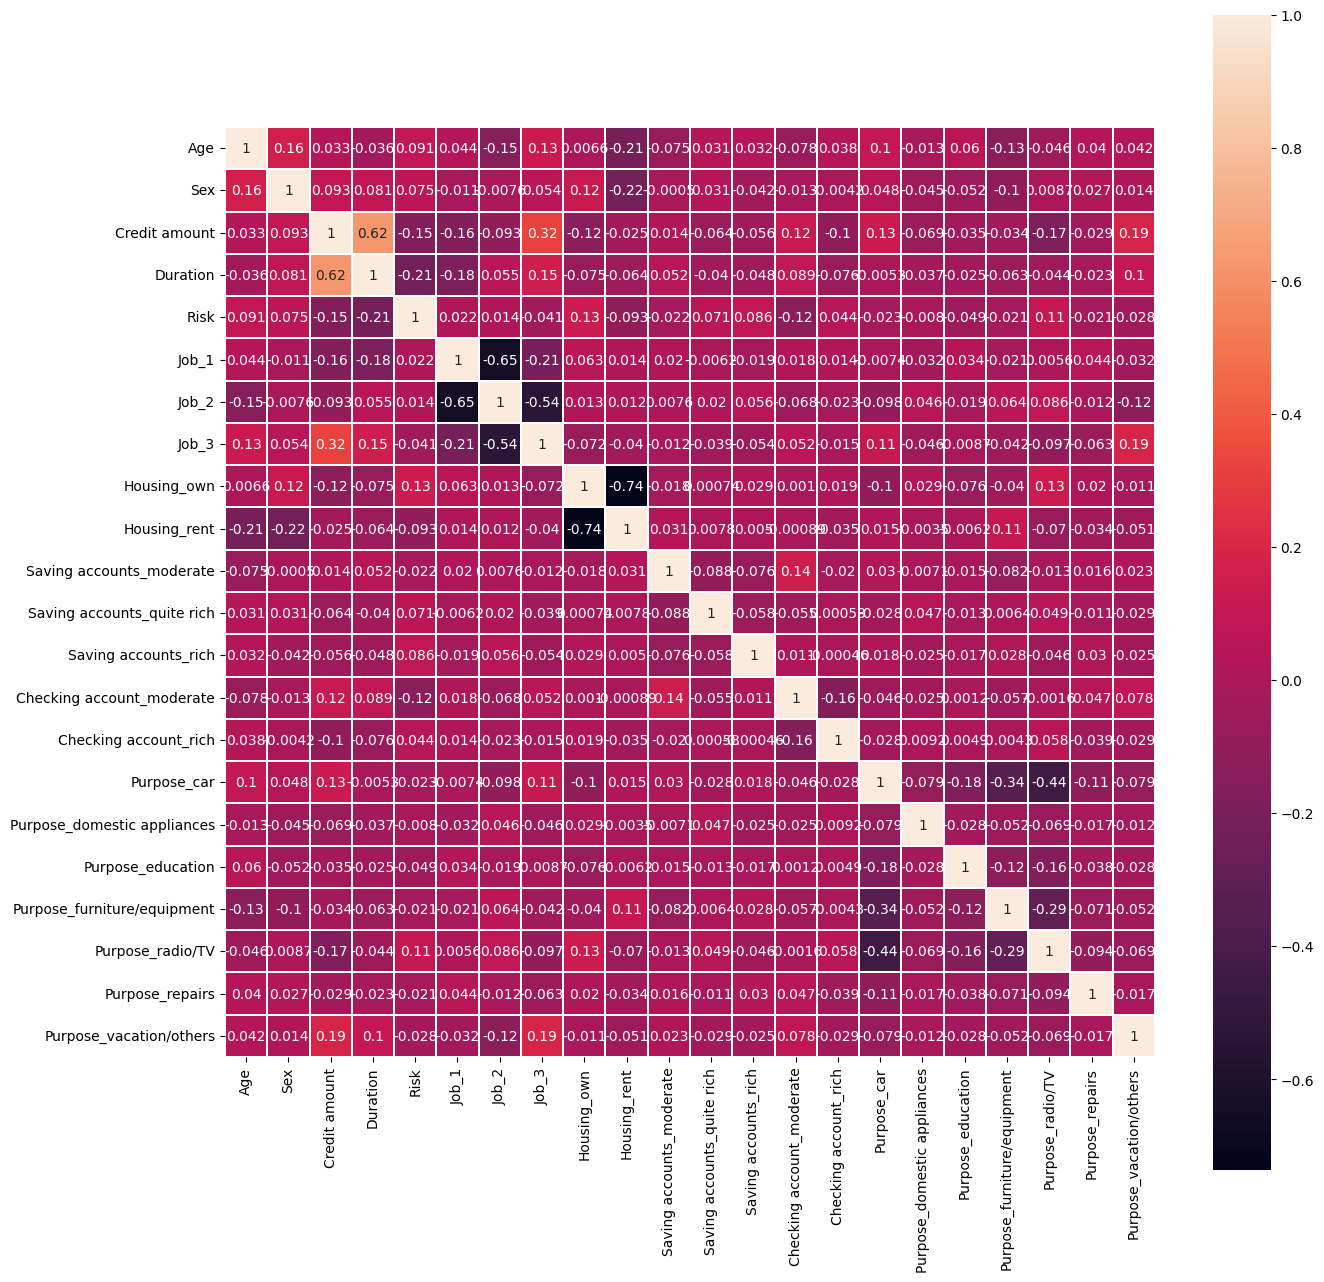

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,  linecolor='white', annot=True)
plt.show()

## Machine learning model

In [48]:
# Seperate target variable from the data
X = df.drop('Risk', axis=1)
y = df["Risk"]

In [49]:
# Feature scaling
X_scaled = StandardScaler().fit_transform(df[numerical_column])
df[numerical_column] = pd.DataFrame(X_scaled, columns=df[numerical_column].columns)

### Using KNN model to predict.

In [50]:
knn_model = KNeighborsClassifier().fit(X,y)

**Model Evalution**

In [51]:
# y_pred for confusion matrix:
y_pred = knn_model.predict(X)

# y_prob for AUC:
y_prob = knn_model.predict_proba(X)[:,1]
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.39      0.48       300
           1       0.77      0.89      0.83       700

    accuracy                           0.74      1000
   macro avg       0.69      0.64      0.65      1000
weighted avg       0.73      0.74      0.73      1000



In [52]:
# AUC (The area with the curve and the axes as the boundaries is called the Area Under Curve)

roc_auc_score(y,y_prob)

0.7932547619047617

**Cross validation**

In [53]:
cv_results = cross_validate(knn_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Mean Test Accuracy: ",cv_results["test_accuracy"].mean())
print("Mean Test f1 score: ",cv_results["test_f1"].mean())
print("Mean Test roc_auc: ",cv_results["test_roc_auc"].mean())

Mean Test Accuracy:  0.655
Mean Test f1 score:  0.7731923090749285
Mean Test roc_auc:  0.5563690476190477


**Hyperparameter tuning**

In [54]:
knn_model = KNeighborsClassifier()
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [55]:
knn_params = {"n_neighbors":range(2,50)}
knn_gs_best = GridSearchCV(knn_model, knn_params, cv=5, n_jobs=-1, verbose=1).fit(X,y)
knn_gs_best.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'n_neighbors': 35}

**Final modeling**

In [56]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X,y)

In [57]:
cv_results = cross_validate(knn_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Mean Test Accuracy: ",cv_results["test_accuracy"].mean())
print("Mean Test f1 score: ",cv_results["test_f1"].mean())
print("Mean Test roc_auc: ",cv_results["test_roc_auc"].mean())

Mean Test Accuracy:  0.708
Mean Test f1 score:  0.8243297386848655
Mean Test roc_auc:  0.5739047619047619


### CART model

In [58]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X,y)

**Model Valuation**

In [67]:
# Split the data train test.
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.30, random_state=17)
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train,y_train)

**Model evalution**

In [68]:
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.35      0.36      0.35        92
           1       0.71      0.70      0.71       208

    accuracy                           0.60       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.60      0.60      0.60       300



0.530309364548495

In [69]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)
cv_results = cross_validate(cart_model, X, y, cv=10, scoring=["accuracy","f1","roc_auc"])
print("Mean Test Accuracy: ",cv_results["test_accuracy"].mean())
print("Mean Test f1 score: ",cv_results["test_f1"].mean())
print("Mean Test roc_auc: ",cv_results["test_roc_auc"].mean())

Mean Test Accuracy:  0.611
Mean Test f1 score:  0.7178964523688205
Mean Test roc_auc:  0.5459523809523809


**Hyperparameter tuning**

In [70]:
cart_model.get_params()
cart_params = {"max_depth": range(1,11),
              "min_samples_split": range(2,20)}

In [71]:
cart_best_grid=GridSearchCV(cart_model, cart_params,scoring="f1", cv=5, n_jobs=-1, verbose=True).fit(X,y)
print("best params: ", cart_best_grid.best_params_)
print("best score: ", cart_best_grid.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
best params:  {'max_depth': 1, 'min_samples_split': 2}
best score:  0.8190719766167336


**Final model**

In [72]:
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X,y)

In [73]:
cv_results = cross_validate(cart_final, X, y, cv=10, scoring=["accuracy","f1","roc_auc"])
print("Mean Test Accuracy: ",cv_results["test_accuracy"].mean())
print("Mean Test f1 score: ",cv_results["test_f1"].mean())
print("Mean Test roc_auc: ",cv_results["test_roc_auc"].mean())

Mean Test Accuracy:  0.7
Mean Test f1 score:  0.8235294117647058
Mean Test roc_auc:  0.5592857142857143


## Summary

This notebook envole the EDA and credit risk prediction.
Notebook using KNN and CART model to predict the credit risk.

First, we doing EDA, data analysis, data preprocessing, future engineering, ML model.

I used the confusion matrix for model evaluation. ROC curve and f1_score for the cross validation.